In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
os.getcwd()

'C:\\Users\\SHYAM'

In [4]:
os.chdir("C:\\Users\\SHYAM\\yolo3")

### importing YOLOv3 weights and configuration and coco object classes

In [5]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")


obj_classes = []
with open("coco.names", "r") as f:
    obj_classes = [line.strip() for line in f.readlines()]



### loading image from current working directory and show image

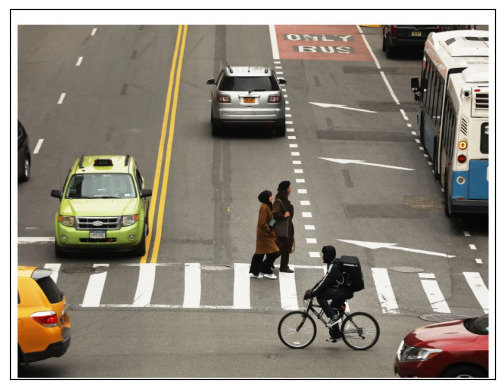

In [6]:

img = cv2.imread("image.jpg")


rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(rgb_img)
plt.xticks([]) 
plt.yticks([]) 
plt.show()




### Need to Create blob of image 

In [7]:
blob = cv2.dnn.blobFromImage(rgb_img, 1/255.0, (416, 416), swapRB=True, crop=False)

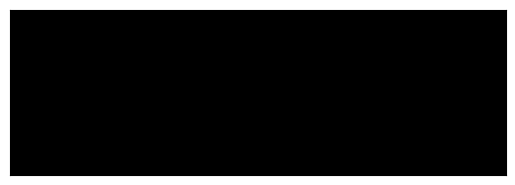

In [8]:
rgb1_img = cv2.cvtColor(blob, cv2.COLOR_BGR2RGB)


plt.imshow(rgb1_img)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

### Set input blob for network

In [9]:
net.setInput(blob)

### Run forward pass on the network

In [10]:
output_layers_names = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_names)


### Initialize lists for detected objects' class IDs, confidences, and bounding boxes

In [11]:

class_ids = []
confidences = []
boxes = []

# Initialize lists for detected objects' class IDs, confidences, and bounding boxes

for output in layerOutputs:
    # Loop over each detection
    for detection in output:
        # Extract class ID and confidence
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        # Filter out weak detections
        if confidence > 0.5:
            # Calculate coordinates of bounding box
            center_x = int(detection[0] * rgb_img.shape[1])
            center_y = int(detection[1] * rgb_img.shape[0])
            width = int(detection[2] * rgb_img.shape[1])
            height = int(detection[3] * rgb_img.shape[0])
            x = int(center_x - width/2)
            y = int(center_y - height/2)
            # Append class ID, confidence, and bounding box coordinates to lists
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, width, height])




###  remove overlapping boxes using non-maximum suppression

In [13]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [14]:
# Loop over the remaining indexes
for i in indexes.flatten():
    # Extract bounding box coordinates
    x, y, w, h = boxes[i]
    # Draw rectangle and label on image
    cv2.rectangle(rgb_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(rgb_img, obj_classes[class_ids[i]], (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 180, 255), 2)


### Showing the detected image along with  its class and bounding box

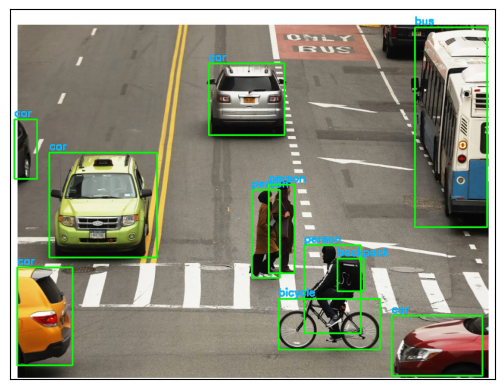

In [15]:
# Show image
cv2.imwrite("final_image.jpg", rgb_img)
final_img=cv2.imread("final_image.jpg")

imgplot = plt.imshow(final_img)
plt.xticks([]) 
plt.yticks([]) 
plt.show()

